# select directry of bird soud 

In [2]:
#using os library to selecting bird sound directory 
import os 

DATASET_PATH = os.listdir()
DATASET_PATH

['.ipynb_checkpoints',
 'audio dataset  preparing .ipynb',
 'bird',
 'bird sound classification through ml.ipynb',
 'bird sound data.xlsx',
 'bird sound detection through CNN.ipynb',
 'bird_1',
 'bird_sound.csv',
 'bird_sound_big_dataset.json',
 'bird_sound_data_mfccs.json',
 'class_examples.png',
 'class_examples1.png',
 'class_examples2.png',
 'data.bird',
 'data_10.json',
 'hilber transformation of bird sound.ipynb',
 'large dataset of bird sound .ipynb',
 'major project .ipynb',
 'toword data science bird sound dectection .ipynb',
 'Untitled.ipynb',
 'Untitled1.ipynb']

In [3]:
DATASET_PATH = os.listdir()[2]
DATASET_PATH

'bird'

# Extracting mfccs feature from bird sound using librosa library 

In [4]:
import json
import math
import librosa

DATASET_PATH 
JSON_PATH = "data_101.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 2.9 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=1724, hop_length=10, num_segments=5):
    
    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all bird sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a bird sub-folder level
        if dirpath is not dataset_path:

            # save bird label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in bird sub-dir
            for f in filenames:

                # load audio file
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sr=sr, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
        
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Processing: bird\10_Rallus_longirostris
bird\10_Rallus_longirostris\hardy13 - Copy (2).wav, segment:1
bird\10_Rallus_longirostris\hardy13 - Copy (2).wav, segment:2
bird\10_Rallus_longirostris\hardy13 - Copy (2).wav, segment:3
bird\10_Rallus_longirostris\hardy13 - Copy (2).wav, segment:4
bird\10_Rallus_longirostris\hardy13 - Copy (2).wav, segment:5
bird\10_Rallus_longirostris\hardy13 - Copy (2).wav, segment:6
bird\10_Rallus_longirostris\hardy13 - Copy (2).wav, segment:7
bird\10_Rallus_longirostris\hardy13 - Copy (2).wav, segment:8
bird\10_Rallus_longirostris\hardy13 - Copy (2).wav, segment:9
bird\10_Rallus_longirostris\hardy13 - Copy (2).wav, segment:10
bird\10_Rallus_longirostris\hardy13 - Copy (3).wav, segment:1
bird\10_Rallus_longirostris\hardy13 - Copy (3).wav, segment:2
bird\10_Rallus_longirostris\hardy13 - Copy (3).wav, segment:3
bird\10_Rallus_longirostris\hardy13 - Copy (3).wav, segment:4
bird\10_Rallus_longirostris\hardy13 - Copy (3).wav, segment:5
bird\10_Rallus_longirostris\

bird\5_Butorides_virescens\hardy7 - Copy.wav, segment:3
bird\5_Butorides_virescens\hardy7 - Copy.wav, segment:4
bird\5_Butorides_virescens\hardy7 - Copy.wav, segment:5
bird\5_Butorides_virescens\hardy7 - Copy.wav, segment:6
bird\5_Butorides_virescens\hardy7 - Copy.wav, segment:7
bird\5_Butorides_virescens\hardy7 - Copy.wav, segment:8
bird\5_Butorides_virescens\hardy7 - Copy.wav, segment:9
bird\5_Butorides_virescens\hardy7 - Copy.wav, segment:10
bird\5_Butorides_virescens\hardy7.wav, segment:1
bird\5_Butorides_virescens\hardy7.wav, segment:2
bird\5_Butorides_virescens\hardy7.wav, segment:3
bird\5_Butorides_virescens\hardy7.wav, segment:4
bird\5_Butorides_virescens\hardy7.wav, segment:5
bird\5_Butorides_virescens\hardy7.wav, segment:6
bird\5_Butorides_virescens\hardy7.wav, segment:7
bird\5_Butorides_virescens\hardy7.wav, segment:8
bird\5_Butorides_virescens\hardy7.wav, segment:9
bird\5_Butorides_virescens\hardy7.wav, segment:10

Processing: bird\6_Egretta_caerulea
bird\6_Egretta_caerulea

# Bird Sound Classification Through Artificial Nurale Network

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 638, 11, 32)       320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 319, 6, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 319, 6, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 317, 4, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 159, 2, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 159, 2, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 158, 1, 32)       

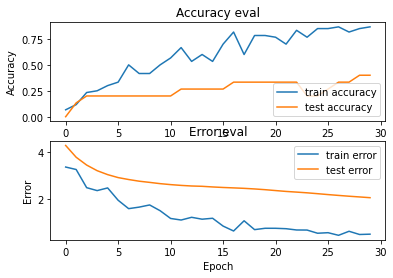

1/1 - 0s - loss: 1.9727 - accuracy: 0.4000

Test accuracy: 0.4000000059604645
Target: 3, Predicted label: [3]


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "bird_sound_data_mfccs.json"


def load_data(data_path):
    

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
   

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):


    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.5))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


def predict(model, X, y):

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[10]
    y_to_predict = y_test[10]

    # predict sample
    predict(model, X_to_predict, y_to_predict)



# Removing Over Fitting 

Data succesfully loaded!
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 8320)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               4260352   
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_20 (Dropout)         

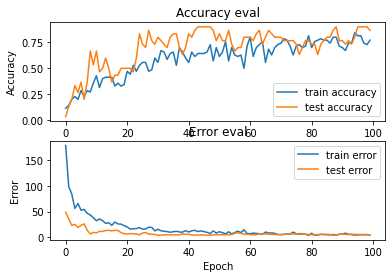

In [13]:


# path to json file that stores MFCCs and bird labels for each processed segment
DATA_PATH 

def load_data(data_path):
    

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return X, y


def plot_history(history):
    
    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


if __name__ == "__main__":

    # load data
    X, y = load_data(DATA_PATH)

    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # build network topology
    model = keras.Sequential([

        # input layer
        keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

        # 1st dense layer
        keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.2),

        # 2nd dense layer
        keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.2),

        # 3rd dense layer
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.2),

        # output layer
        keras.layers.Dense(10, activation='softmax')
    ])

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

    # plot accuracy and error as a function of the epochs
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[10]
    y_to_predict = y_test[10]

    # predict sample
    predict(model, X_to_predict, y_to_predict)







# CNN model for bird sound classification 

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 638, 11, 32)       320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 319, 6, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 319, 6, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 317, 4, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 159, 2, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 159, 2, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 158, 1, 32)       

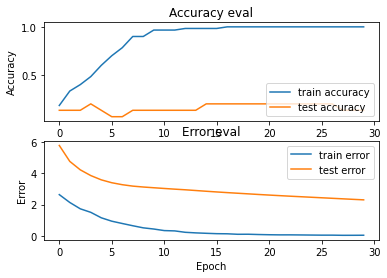

1/1 - 0s - loss: 2.3101 - accuracy: 0.2000

Test accuracy: 0.20000000298023224
Target: 8, Predicted label: [9]


In [14]:
DATA_PATH 

def load_data(data_path):

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
  

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
   

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.0))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


def predict(model, X, y):


    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[10]
    y_to_predict = y_test[10]

    # predict sample
    predict(model, X_to_predict, y_to_predict)



# CNN model for bird sound classification using big data 

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 638, 11, 32)       320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 319, 6, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 319, 6, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 317, 4, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 159, 2, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 159, 2, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 158, 1, 32)      

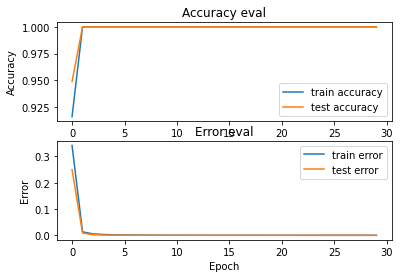

78/78 - 3s - loss: 6.8070e-06 - accuracy: 1.0000

Test accuracy: 1.0
Target: 6, Predicted label: [6]


In [15]:


DATA_PATH ="bird_sound_big_dataset.json"


def load_data(data_path):

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
  

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
   

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.0))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


def predict(model, X, y):


    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[10]
    y_to_predict = y_test[10]

    # predict sample
    predict(model, X_to_predict, y_to_predict)

